<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/ELT575_semana4_51687.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Shape x_train: (50000, 32, 32, 3)
Shape y_train: (50000, 10)
Shape x_test : (10000, 32, 32, 3)
Shape y_test : (10000, 10)


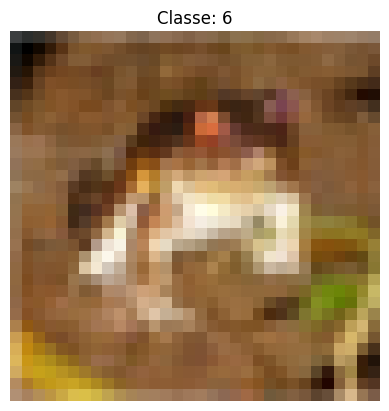

In [1]:
# ===============================
# 1. Importação de bibliotecas
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# ===============================
# 2. Carregamento do dataset CIFAR-10
# ===============================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ===============================
# 3. Normalização das imagens
# ===============================
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# ===============================
# 4. One-hot encoding dos rótulos
# ===============================
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# ===============================
# 5. Verificação rápida
# ===============================
print("Shape x_train:", x_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape x_test :", x_test.shape)
print("Shape y_test :", y_test.shape)

# Visualizar uma imagem de exemplo
plt.imshow(x_train[0])
plt.title("Classe: {}".format(np.argmax(y_train[0])))
plt.axis("off")
plt.show()


In [2]:
# =========================
# Transfer Learning (VGG16) para CIFAR-10
# =========================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# (opcional, mas recomendado) - usar preprocess_input do VGG16
# OBS: preprocess_input espera pixels em 0..255 (não 0..1)
x_train_vgg = preprocess_input((x_train * 255.0).astype("float32"))
x_test_vgg  = preprocess_input((x_test  * 255.0).astype("float32"))

# Base pré-treinada (convolucional) - sem o topo (classificador original)
base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base.trainable = False  # congela toda a base no início

# Cabeça nova para 10 classes
model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [3]:
history = model.fit(
    x_train_vgg, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test_vgg, y_test, verbose=0)
print("Acurácia no teste:", test_acc)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.3818 - loss: 6.2234 - val_accuracy: 0.5598 - val_loss: 1.2637
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5252 - loss: 1.3889 - val_accuracy: 0.6071 - val_loss: 1.1449
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5817 - loss: 1.2112 - val_accuracy: 0.6260 - val_loss: 1.0893
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6064 - loss: 1.1264 - val_accuracy: 0.6308 - val_loss: 1.0687
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6225 - loss: 1.0668 - val_accuracy: 0.6427 - val_loss: 1.0539
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6417 - loss: 1.0285 - val_accuracy: 0.6469 - val_loss: 1.0330
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6477 - loss: 0.9955 - val_accuracy: 0.6508 - val_loss: 1.0276
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6606 - loss: 0.9688 - val_a

In [4]:
# =========================
# Fine-tuning: descongelar últimos blocos do VGG16
# =========================
base.trainable = True

# Congela tudo até o bloco 4
for layer in base.layers[:-4]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_ft = model.fit(
    x_train_vgg, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

test_loss_ft, test_acc_ft = model.evaluate(x_test_vgg, y_test, verbose=0)
print("Acurácia no teste (fine-tuning):", test_acc_ft)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6221 - loss: 1.1292 - val_accuracy: 0.6991 - val_loss: 0.8622
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7370 - loss: 0.7896 - val_accuracy: 0.7599 - val_loss: 0.7428
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7886 - loss: 0.6278 - val_accuracy: 0.7734 - val_loss: 0.7079
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8250 - loss: 0.5124 - val_accuracy: 0.7666 - val_loss: 0.7441
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8535 - loss: 0.4170 - val_accuracy: 0.7808 - val_loss: 0.7292
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8838 - loss: 0.3321 - val_accuracy: 0.7834 - val_loss: 0.7564
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9044 - loss: 0.2765 - val_accuracy: 0.7879 - val_loss: 0.7917
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9201 - loss: 0.2271 - 

Comentário
